# Lab 1: Bike Share (Python)

In [ ]:
# The following line imports the rpy2 library.
import rpy2.rinterface

# And this command loads the rpy2 extension into the notebook. This only needs to be run once.
%load_ext rpy2.ipython 


In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
from scipy import stats
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#from plotly.graph_objs import *
import os
import statsmodels as sm

import statsmodels.formula.api as smf

* season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
* weather: 1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy
* temp: outdoor temperature (measured in Fahrenheit)
* humidity: relative humidity (as a percentage)
* windspeed: wind speeds (measured in miles per hour)
* count: the number of bike rentals in a given hourly period

In [2]:
data = pd.read_csv('bike_share.csv')
countData = data['count']
tempData = data['temp']
humidityData = data['humidity']
windspeedData = data['windspeed']

a)Construct scatter plots of count versus temp, humidity and windspeed, being sure to appropriately label your axes. In each case describe the linear relationship you observe in terms of ‘direction’ and ‘strength’. Use the correlation coefficient in each case to formalize this interpretation.

In [3]:
#Function
def getLayout(y_str, x_str):
    layout = dict(
                titlefont=dict(
                    # family='sans serif',
                    size=25,
                    # color='#ff7f0e'
                ),
                title = y_str,
                  yaxis = dict(zeroline = False,
                               showgrid=False,
                               showline=True,
                                ticks='outside',
                               title = "# Bike Rentals (count)"),
                  xaxis = dict(zeroline = False,
                               showgrid=False,
                               showline=True,
                                ticks='outside',
                                title = x_str)
                 )
    return layout

def getDot(xData, yData):
    dot = go.Scatter(
        x = xData.tolist(),
        y = yData.tolist(),
        #name = 'Virtual Male',
        mode = 'markers',
        marker = dict(
            size = 10,
            color = 'rgb(105, 153, 170)',
            line = dict(
                width = 1,
            )
        )
    )
    return dot

In [5]:
init_notebook_mode(connected=True)

#Count v. Temp
corrCoef1 = np.corrcoef(tempData,countData)[0,1]
print(corrCoef1)
fig1 = dict(data=[getDot(tempData,countData)], layout= getLayout('Count v. Temp','Temp (F)'))
iplot(fig1)

0.394453644967


Based on the plot the linear relationship is positive. Thus, as the tempature inceases so does the number of bike rentals. But due to a coorelation coefficient of 0.3945, since it is closer to zero, the linear relationship is weak. In conclusion, the linear relationship between the # of bike rentals and the tempature is relatively weak and positive.

In [6]:
#Count v. Humidity
corrCoef2 = np.corrcoef(humidityData,countData)[0,1]
print(corrCoef2)
fig2 = dict(data=[getDot(humidityData,countData)], layout= getLayout('Count v. Humidity','Relative Humidity (%)'))
iplot(fig2)

-0.317371478877


Based on the plot the linear relationship is negative. Thus, as the relative humidity inceases, the number of bike rentals will decrease. But due to a coorelation coefficient of -0.3173, since it is closer to zero, the linear relationship is weak. In conclusion, the linear relationship between the # of bike rentals and the relative humidity is relatively weak and negative.

In [7]:
#Count v. Windspeed
corrCoef3 = np.corrcoef(windspeedData,countData)[0,1]
print(corrCoef3)
fig3 = dict(data=[getDot(windspeedData,countData)], layout= getLayout('Count v. Windspeed','Windspeed (mph)'))
iplot(fig3)

0.10136947021


Based on the plot the linear relationship is positive. Thus, as the windspeed inceases so does the number of bike rentals. But due to a coorelation coefficient of 0.1013, since it is closer to zero, the linear relationship is weak. In conclusion, the linear relationship between the # of bike rentals and windspeed is relatively weak and positive.

b)For each relationship in part (a) calculate $\hat{𝛽_{0}}$ and $\hat{𝛽_{1}}$ and state the equation of the line-of-best-fit, treating count as the response variable and temp, humidity and windspeed as explanatory variables. Note that you must use the equations derived in class to perform these calculations. You may, however, use automated functions (such as lm() in R and ols() in Python) to check your answers.

In [8]:
#betahat0 = ybar - beta1hat*xbar
#beta1hat = (correlationcoeff*Sy)/Sx
def getBetaHat1(r,x,y):
    sdX = np.std(x)
    sdY = np.std(y)
    betaHat1 = (r*sdY)/sdX
    return betaHat1

def getBetaHat0(betaHat1,x,y):
    xBar = np.mean(x)
    yBar = np.mean(y)
    betaHat0 = yBar - (betaHat1*xBar)
    return betaHat0

In [9]:
#Count v. Temp
betaHat1 = getBetaHat1(corrCoef1,tempData,countData)
betaHat0 = getBetaHat0(betaHat1,tempData,countData)
print(betaHat1)
print(betaHat0)

5.0947447119
-156.985617821


Line of best fit: y = -156.9856 + 5.0947x  
Where y is bike rentals and x is temperature.

In [10]:
#Count v. Humidity
betaHat1 = getBetaHat1(corrCoef2,humidityData,countData)
betaHat0 = getBetaHat0(betaHat1,humidityData,countData)
print(betaHat1)
print(betaHat0)

-2.98726857853
376.44560833


Line of best fit: y = 376.4456 - 2.9873x  
Where y is bike rentals and x is humidity.

In [11]:
#Count v. Windspeed
betaHat1 = getBetaHat1(corrCoef3,windspeedData,countData)
betaHat0 = getBetaHat0(betaHat1,windspeedData,countData)
print(betaHat1)
print(betaHat0)

2.24905791734
162.787550335


Line of best fit: y = 162.7876 + 2.2491x  
Where y is bike rentals and x is windspeed.

c)Add the fitted regression lines from part (b) to the appropriate scatter plots
constructed in part (a).

In [12]:
def getDotFit(xData, yData, line):
    dot1 = go.Scatter(
        x = xData.tolist(),
        y = yData.tolist(),
        #name = 'Virtual Male',
        mode = 'markers',
        marker = dict(
            size = 10,
            color = 'rgb(105, 153, 170)',
            line = dict(
                width = 1,
            )
        )
    )
    dot2 = go.Scatter(
        x = xData.tolist(),
        y = line,
        #name = 'Virtual Male',
        mode ='lines',
        marker = go.Marker(color='rgb(255, 0, 0)'),
        name ='Fit'
    )
    data = [dot1,dot2]
    return data

In [13]:
#Count v. Temp
line = -156.9856 + (5.0947*tempData)
corrCoef1 = np.corrcoef(tempData,countData)[0,1]
print(corrCoef1)
fig1 = dict(data=getDotFit(tempData,countData,line), layout= getLayout('Count v. Temp','Temp (F)'))
iplot(fig1)

0.394453644967


/Users/jencruz/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




In [14]:
#Count v Humidity
line2 = 376.4456 + (-2.9873*humidityData)
corrCoef2 = np.corrcoef(humidityData,countData)[0,1]
print(corrCoef2)
fig2 = dict(data=getDotFit(humidityData,countData,line2), layout= getLayout('Count v. Humidity','Relative Humidity (%)'))
iplot(fig2)

-0.317371478877


/Users/jencruz/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




In [15]:
#Count v Windspeed
line3 = 162.7876 + (2.2491*windspeedData)
corrCoef3 = np.corrcoef(windspeedData,countData)[0,1]
print(corrCoef3)
fig3 = dict(data=getDotFit(windspeedData,countData,line3), layout= getLayout('Count v. Windspeed','Windspeed (mph)'))
iplot(fig3)

0.10136947021


/Users/jencruz/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




d)Based on your findings thus far, rank the variables temp, humidity and windspeed in terms of the strength of their relationship with bike rentals, from most weakly associated to most strongly associated.

From weakly associated to most strongly associated we have to rank based on increasing magnitude of the correlation coefficient. Therefore, the order will begin with the weakest linear relationship between # bike rentals and windspeed  with a correlation coefficient of 0.1014, then the linear relationship between # bike rentals and humidity with a correlation coefficient of -0.3174, and lastly, the strongest linear relationship between # bike rentals and temperature with a correlation coefficient of 0.3945.

e)Using your lines-of-best-fit calculated in (b), calculate the expected number of bike rentals in hours for which:
i. the outside temperature is 70 degrees Fahrenheit
ii. the wind speed is 10 miles per hour
iii. the relative humidity is 40%

In [16]:
#i. the outside temperature is 70 degrees Fahrenheit
temp = -156.9856 + (5.0947*70)
print(temp)

199.64339999999996


Using the line of best fit equation between # bike rentals and temperature (F), then the $\hat{y}$ when the temperature is 70 (F) is about 200.

In [17]:
#ii. the windspeed is 10 miles per hour
windspeed = 162.7876 + (2.2491*10)
print(windspeed)

185.27859999999998


Using the line of best fit equation between # bike rentals and windspeed (mph), then the $\hat{y}$ when the windspeed is 10 mph is about 185.

In [18]:
#iii. the relative humidity is 40%
humidity = 376.4456 + (-2.9873*40)
print(humidity)

256.95360000000005


Using the line of best fit equation between # bike rentals and humidity (%), then the $\hat{y}$ when the humidity is 40% is about 257.

f)In each of the cases in part (e) the value of the explanatory variable lies within the
range of values actually observed. What risk does one face when predicting
outside the range of observed explanatory variable values?

One faces the risk of preditcing poorly with this fitted model because of the the fact that the relationship between the response (y) and the explanatory varibale (x) may not be the same with explanatory variables within the range of values actually obsereved and explanatory variables not within the range of values actually observed in the sampled given.

g)Construct boxplots of count vs. season and count vs. weather, being sure to appropriately label your axes. Comment on the relationship between bike rentals and these two variables.

In [19]:
def getTrace(xVals, yVals, nameStr, colorStr):
    trace = go.Box(
            x = xVals,
            y= yVals,
            name = nameStr,
            marker=dict(
                color= colorStr
            )
        )
    return trace

# def getTrace(xValsList,yValsList):
#     trace0 = go.Box(
#         x = xVals1,
#         y= yVals1,
#         name = "Summer",
#         marker=dict(
#             color='rgb(255,0,0)'
#         )
#     )
#     trace1 = go.Box(
#         x = xVals2,
#         y= yVals2,
#         name = "I felt as if I had two bodies.",
#         marker=dict(
#             color='rgb(0,204,0)'
#         )
#     )
#     data = [trace0, trace1]
#     return data

def getLayout2(titleStr):
    layout = go.Layout(
        xaxis=dict(
                zeroline = False,
                showgrid=False,
                showline=True
        ),
        yaxis=dict(
            title='# Bike Rentals',
            zeroline=False,
            showgrid=False,
            showline=True,
            ticks='outside'
        ),
        boxmode='group',
        titlefont=dict(
            size=25
        ),
        title = titleStr
    )
    return layout


In [20]:
data = pd.read_csv('bike_share.csv')
ySpring = data[data["season"] == 1]["count"]
ySummer = data[data["season"] ==2]["count"]
yFall = data[data["season"] ==3]["count"]
yWinter = data[data["season"] ==4]["count"]

xSpring = ['Spring']*len(ySpring)
xSummer = ['Summer']*len(ySummer)
xFall = ['Fall']*len(yFall)
xWinter = ['Winter']*len(yWinter)

trace1 = getTrace(xSpring,ySpring,'Spring','rgb(244, 194, 66)')
trace2 = getTrace(xSummer,ySummer,'Summer','rgb(109, 165, 11)')
trace3 = getTrace(xFall,yFall,'Fall','rgb(174, 107, 178)')
trace4 = getTrace(xWinter,yWinter,'Winter','rgb(168, 69, 78)')

box1 = [trace1,trace2,trace3,trace4]
figSeason = go.Figure(data=box1, layout=getLayout2("Season"))
iplot(figSeason)

Based on the box plot above, there is a very weak relationship is shown between the number of bike rentals and the season. This plot illustartes that Spring has the fewest bike rentals. It also shows that Summer, Fall and Winter have similar number of bike rentals.

In [21]:
yNice = data[data['weather'] ==1]['count']
yCloudy = data[data['weather'] ==2]['count']
yRainy = data[data['weather'] ==3]['count']
yStormy = data[data['weather'] ==4]['count']

xNice = ['Nice']*len(yNice)
xCloudy = ['Cloudy']*len(yCloudy)
xRainy = ['Rainy']*len(yRainy)
xStormy = ['Stormy']*len(yStormy)

trace1 = getTrace(xNice,yNice,'Nice','rgb(244, 194, 66)')
trace2 = getTrace(xCloudy,yCloudy,'Cloudy','rgb(109, 165, 11)')
trace3 = getTrace(xRainy,yRainy,'Rainy','rgb(174, 107, 178)')
trace4 = getTrace(xStormy,yStormy,'Stormy','rgb(168, 69, 78)')

box2 = [trace1,trace2,trace3,trace4]
figWeather = go.Figure(data=box2, layout=getLayout2("Weather"))
iplot(figWeather)

Based on the box plot above, the number of bike rentals does change based on the weather (ignoring stromy since there is not enough data for that weather category). So the nicer the weather, the more bike rentals there seems to be and vice versa the worse the weather gets the fewer bike rentals there seems to be.

h)Using automated functions (such as lm() in R and ols() in Python) fit a simple linear regression model between count, and each of season and weather. Interpret the regression coefficients in each case. Do these interpretations seem practically useful?

In [22]:
seasonData = data["season"]
lm = smf.OLS(countData, sm.tools.tools.add_constant(seasonData), )
slrModel_Season = lm.fit()
slrModel_Season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     298.7
Date:                Thu, 13 Sep 2018   Prob (F-statistic):           4.76e-66
Time:                        13:49:19   Log-Likelihood:                -71898.
No. Observations:               10886   AIC:                         1.438e+05
Df Residuals:                   10884   BIC:                         1.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.0872      4.211     29.705      0.000     116.833     133.342
season        26.5246      1.535     17.283      0.000      23.516      29.533
==============================================================================
Omnibus:                     2041.415   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3536.912
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       4.349   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the summary above $\hat{𝛽_{0}}$ is 125.0872 and $\hat{𝛽_{1}}$ is 26.5246. Interpreting the intercept, the expected response value when the season is 0 are 125 bike rentals. Also, for every unit increase in season then we expect an increase in bike rentals by 26. This is no practically useful since the results depend on how the seasons are labeled. Additionally, there are only four seasons, so based on the way we've labeled seasons it wouldn't make sense to have a season 0. 

In [23]:
weatherData = data["weather"]
lm = smf.OLS(countData, sm.tools.tools.add_constant(weatherData), )
slrModel_Weather = lm.fit()
slrModel_Weather.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     183.2
Date:                Thu, 13 Sep 2018   Prob (F-statistic):           2.11e-41
Time:                        13:49:20   Log-Likelihood:                -71955.
No. Observations:               10886   AIC:                         1.439e+05
Df Residuals:                   10884   BIC:                         1.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.7273      4.221     57.748      0.000     235.454     252.000
weather      -36.7683      2.717    -13.535      0.000     -42.093     -31.443
==============================================================================
Omnibus:                     2024.230   Durbin-Watson:                   0.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3476.744
Skew:                           1.220   Prob(JB):                         0.00
Kurtosis:                       4.309   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the summary above $\hat{𝛽_{0}}$ is 243.7273 and $\hat{𝛽_{1}}$ is -36.7683. Interpreting the intercept, the expected response value when the weather is 0 are 244 bike rentals. Also, for every unit increase in season then we expect an decrease in bike rentals by 37. This is no practically useful since the results depend on how the weather categories are labeled. Due to this reason, if we had a set of data with 5 weaher categories having a weather 0 can change in category or can be a completely new weather category, which would ultimately change the results. But in our case were there are only 4 categories, it does not make sense to have a weather 0.

i)Explain why the linear regressions in part (h) are inappropriate. Suggest an alternative approach that would be more appropriate.

In conclusion, neither interpretation for season or weather make any sense. These interpretations were useless because we are treating categorical explanatory variables as numerical. A solution to this is to use a dummy predictor (indicatory variable), this will change the categorial variable into a continuous one. If a level is present then the variable will be equal to 1 and all others will be 0 meaning the level is absent. The number of dummy variables needed if n is the number of levels in a categorical explanatory variable is n-1 since for every level present, one dummy variable is created.

# Lab 1: Bike Share (R)

In [1]:
# The following line imports the rpy2 library.
import rpy2.rinterface

# And this command loads the rpy2 extension into the notebook. This only needs to be run once.
%load_ext rpy2.ipython 

%R
data <- read.csv(file = "bike_share.csv", header = T)
countData <- data$count
# tempData <- data$temp
# humidityData <- data$humidity
# windspeedData <- data$windspeed

SyntaxError: invalid syntax (<ipython-input-1-7a5268d3c267>, line 9)

* season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
* weather: 1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy
* temp: outdoor temperature (measured in Fahrenheit)
* humidity: relative humidity (as a percentage)
* windspeed: wind speeds (measured in miles per hour)
* count: the number of bike rentals in a given hourly period

a) Construct scatter plots of count versus temp, humidity and windspeed, being sure to appropriately label your axes. In each case describe the linear relationship you observe in terms of ‘direction’ and ‘strength’. Use the correlation coefficient in each case to formalize this interpretation.

In [25]:
%%R
#Count v Temp
rTemp <- cor(tempData, countData)
print(r)
plot(tempData, countData, ylab = "# Bike Rentals", xlab = "Temp (F)")

ERROR:root:Cell magic `%%R` not found.


Based on the plot the linear relationship is positive. Thus, as the tempature inceases so does the number of bike rentals. But due to a coorelation coefficient of 0.3945, since it is closer to zero, the linear relationship is weak. In conclusion, the linear relationship between the # of bike rentals and the tempature is relatively weak and positive.

In [26]:
%%R
#Count v Humidity
rHumidity <- cor(humidityData, countData)
print(r)
plot(humidityData, countData, ylab = "# Bike Rentals", xlab = "RelativeHumidity (%)")

ERROR:root:Cell magic `%%R` not found.


Based on the plot the linear relationship is negative. Thus, as the relative humidity inceases, the number of bike rentals will decrease. But due to a coorelation coefficient of -0.3173, since it is closer to zero, the linear relationship is weak. In conclusion, the linear relationship between the # of bike rentals and the relative humidity is relatively weak and negative.

In [27]:
%%R
#Count v Windspeed
rWindspeed <- cor(windspeedData, countData)
print(r)
plot(windspeedData, countData, ylab = "# Bike Rentals", xlab = "Windspeed (mph)")

ERROR:root:Cell magic `%%R` not found.


Based on the plot the linear relationship is positive. Thus, as the windspeed inceases so does the number of bike rentals. But due to a coorelation coefficient of 0.1013, since it is closer to zero, the linear relationship is weak. In conclusion, the linear relationship between the # of bike rentals and windspeed is relatively weak and positive.

b)For each relationship in part (a) calculate $\hat{𝛽_{0}}$ and $\hat{𝛽_{1}}$ and state the equation of the line-of-best-fit, treating count as the response variable and temp, humidity and windspeed as explanatory variables. Note that you must use the equations derived in class to perform these calculations. You may, however, use automated functions (such as lm() in R and ols() in Python) to check your answers.

In [28]:
%%R
betaHat1 <- (rTemp * sd(countData)) / sd(tempData)
betaHat0 <- mean(countData) - betaHat1 * mean(tempData)
print(betaHat1)
print(betaHat0)

ERROR:root:Cell magic `%%R` not found.


Line of best fit: y = -156.9856 + 5.0947x  
Where y is bike rentals and x is temperature.

In [29]:
%%R
betaHat1 <- (rHumidity * sd(countData)) / sd(humidityData)
betaHat0 <- mean(countData) - betaHat1 * mean(humidityData)
print(betaHat1)
print(betaHat0)

ERROR:root:Cell magic `%%R` not found.


Line of best fit: y = 376.4456 - 2.9873x  
Where y is bike rentals and x is humidity.

In [30]:
%%R
betaHat1 <- (rWindspeed * sd(countData)) / sd(windspeedData)
betaHat0 <- mean(countData) - betaHat1 * mean(windspeedData)
print(betaHat1)
print(betaHat0)

ERROR:root:Cell magic `%%R` not found.


Line of best fit: y = 162.7876 + 2.2491x  
Where y is bike rentals and x is windspeed.

c)Add the fitted regression lines from part (b) to the appropriate scatter plots constructed in part (a).


In [31]:
%%R
par(mfrow = c(1,3))
plot(tempData, countData, ylab = "# Bike Rentals", xlab = "Temp (F)")
#abline(reg = lm(countData ~ tempData), lwd = 2, col = "red")
abline(a=-156.9856, b=5.0947, lwd = 2, col = "red")
plot(humidityData, countData, ylab = "# Bike Rentals", xlab = "Relative Humidity (%)")
#abline(reg = lm(countData~ humidityData), lwd = 2, col = "red")
abline(a=376.4456, b=-2.9873, lwd = 2, col = "red")
plot(windspeedData, countData, ylab = "# Bike Rentals", xlab = "Windspeed (mph)")
#abline(reg = lm(countData ~ windspeedData), lwd = 2, col = "red")
abline(a=162.7876, b=2.2491, lwd = 2, col = "red")

ERROR:root:Cell magic `%%R` not found.


d)Based on your findings thus far, rank the variables temp, humidity and windspeed in terms of the strength of their relationship with bike rentals, from most weakly associated to most strongly associated.

From weakly associated to most strongly associated we have to rank based on increasing magnitude of the correlation coefficient. Therefore, the order will begin with the weakest linear relationship between # bike rentals and windspeed  with a correlation coefficient of 0.1014, then the linear relationship between # bike rentals and humidity with a correlation coefficient of -0.3174, and lastly, the strongest linear relationship between # bike rentals and temperature with a correlation coefficient of 0.3945.

e)Using your lines-of-best-fit calculated in (b), calculate the expected number of bike rentals in hours for which:
i. the outside temperature is 70 degrees Fahrenheit
ii. the wind speed is 10 miles per hour
iii. the relative humidity is 40%

In [170]:
#i. the outside temperature is 70 degrees Fahrenheit
temp <- -156.9856 + (5.0947*70)
print(temp)

199.64339999999996


Using the line of best fit equation between # bike rentals and temperature (F), then the $\hat{y}$ when the temperature is 70 (F) is about 200.

In [171]:
#ii. the wind speed is 10 miles per hour
windspeed <- 162.7876 + (2.2491*10)
print(windspeed)

185.27859999999998


Using the line of best fit equation between # bike rentals and windspeed (mph), then the $\hat{y}$ when the windspeed is 10 mph is about 185.

In [172]:
#iii. the relative humidity is 40%
humidity <- 376.4456 + (-2.9873*40)
print(humidity)

256.95360000000005


Using the line of best fit equation between # bike rentals and humidity (%), then the $\hat{y}$ when the humidity is 40% is about 257.

f)In each of the cases in part (e) the value of the explanatory variable lies within the range of values actually observed. What risk does one face when predicting outside the range of observed explanatory variable values?

One faces the risk of preditcing poorly with this fitted model because of the the fact that the relationship between the response (y) and the explanatory varibale (x) may not be the same with explanatory variables within the range of values actually obsereved and explanatory variables not within the range of values actually observed in the sampled given.

g)Construct boxplots of count vs. season and count vs. weather, being sure to appropriately label your axes. Comment on the relationship between bike rentals and these two variables.

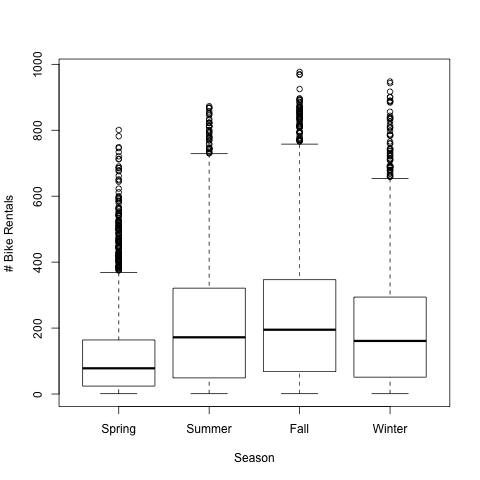

In [178]:
%%R
seasonData <- data$season
boxplot(countData ~ seasonData, xaxt = "n", ylab = "# Bike Rentals", xlab = "Season")
axis(side = 1, at = 1:4, labels = c("Spring", "Summer", "Fall", "Winter"))

Based on the box plot above, there is a very weak relationship is shown between the number of bike rentals and the season. This plot illustartes that Spring has the fewest bike rentals. It also shows that Summer, Fall and Winter have similar number of bike rentals.

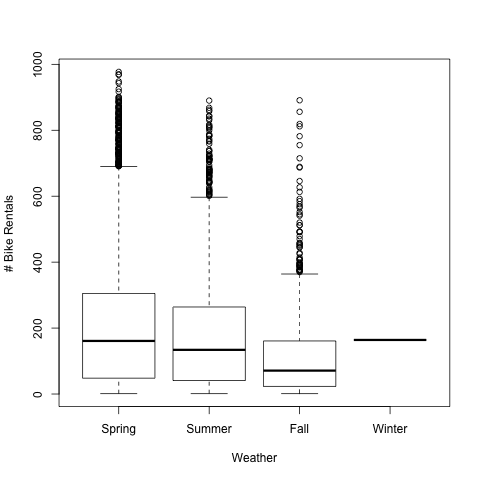

In [179]:
%%R
weatherData <- data$weather
boxplot(countData ~ weatherData, xaxt = "n", ylab = "# Bike Rentals", xlab = "Weather")
axis(side = 1, at = 1:4, labels = c("Spring", "Summer", "Fall", "Winter"))

Based on the box plot above, the number of bike rentals does change based on the weather (ignoring stromy since there is not enough data for that weather category). So the nicer the weather, the more bike rentals there seems to be and vice versa the worse the weather gets the fewer bike rentals there seems to be.

h)Using automated functions (such as lm() in R and ols() in Python) fit a simple linear regression model between count, and each of season and weather. Interpret the regression coefficients in each case. Do these interpretations seem practically useful?

In [205]:
%%R
#Don't know how to solve error but runs correclty on Rstudio and results are the same as Python results (summary())
slrModel_Season <- lm(countData ~ seasonData)
print(slrModel_Season)


Call:
lm(formula = countData ~ seasonData)

Coefficients:
(Intercept)   seasonData  
     125.09        26.52  



Based on the summary above $\hat{𝛽_{0}}$ is 125.0872 and $\hat{𝛽_{1}}$ is 26.5246. Interpreting the intercept, the expected response value when the season is 0 are 125 bike rentals. Also, for every unit increase in season then we expect an increase in bike rentals by 26. This is no practically useful since the results depend on how the seasons are labeled. Additionally, there are only four seasons, so based on the way we've labeled seasons it wouldn't make sense to have a season 0. 

In [2]:
%%R
#Don't know how to solve error but runs correclty on Rstudio and results are the same as Python results (summary())
slrModel_Weather <- lm(countData ~ weatherData)
print(slrModel_Weather)
print(summary(lm(slrModel_Weather)))

ERROR:root:Cell magic `%%R` not found.


Based on the summary above $\hat{𝛽_{0}}$ is 243.7273 and $\hat{𝛽_{1}}$ is -36.7683. Interpreting the intercept, the expected response value when the weather is 0 are 244 bike rentals. Also, for every unit increase in season then we expect an decrease in bike rentals by 37. This is no practically useful since the results depend on how the weather categories are labeled. Due to this reason, if we had a set of data with 5 weaher categories having a weather 0 can change in category or can be a completely new weather category, which would ultimately change the results. But in our case were there are only 4 categories, it does not make sense to have a weather 0.

i)Explain why the linear regressions in part (h) are inappropriate. Suggest an alternative approach that would be more appropriate.

In conclusion, neither interpretation for season or weather make any sense. These interpretations were useless because we are treating categorical explanatory variables as numerical. A solution to this is to use a dummy predictor (indicatory variable), this will change the categorial variable into a continuous one. If a level is present then the variable will be equal to 1 and all others will be 0 meaning the level is absent. The number of dummy variables needed if n is the number of levels in a categorical explanatory variable is n-1 since for every level present, one dummy variable is created.